In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = 'dermatology_database_1.csv'  # Update with your file path if needed
data = pd.read_csv(file_path)

# Convert 'age' column to numeric, replacing non-numeric entries with NaN, then filling with the median age
data['age'] = pd.to_numeric(data['age'], errors='coerce')
data['age'].fillna(data['age'].median(), inplace=True)

# Split dataset into features (X) and target (y)
X = data.drop(columns=['class'])
y = data['class']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train and evaluate SVM classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_preds)

# Train and evaluate Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)

# Generate classification reports
svm_report = classification_report(y_test, svm_preds)
rf_report = classification_report(y_test, rf_preds)

# Print results
print("SVM Classifier Results:")
print(f"Accuracy: {svm_accuracy:.2f}")
print(svm_report)

print("Random Forest Classifier Results:")
print(f"Accuracy: {rf_accuracy:.2f}")
print(rf_report)


<ipython-input-1-a995e843c74a>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(), inplace=True)


SVM Classifier Results:
Accuracy: 0.97
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      0.83      0.91        12
           3       1.00      1.00      1.00        15
           4       0.83      1.00      0.91        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         4

    accuracy                           0.97        74
   macro avg       0.97      0.97      0.97        74
weighted avg       0.98      0.97      0.97        74

Random Forest Classifier Results:
Accuracy: 0.96
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       0.91      0.83      0.87        12
           3       1.00      1.00      1.00        15
           4       0.82      0.90      0.86        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00 

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = 'dermatology_database_1.csv'  # Update this path if needed
data = pd.read_csv(file_path)

# Convert 'age' column to numeric, replacing non-numeric entries with NaN, then filling with the median age
data['age'] = pd.to_numeric(data['age'], errors='coerce')
data['age'].fillna(data['age'].median(), inplace=True)

# Identify numeric columns for outlier detection
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Detect outliers using the IQR method
Q1 = data[numeric_cols].quantile(0.25)
Q3 = data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find rows with outliers
outliers = ((data[numeric_cols] < lower_bound) | (data[numeric_cols] > upper_bound)).any(axis=1)

# Print outlier information
print(f"Number of outliers detected: {outliers.sum()}")

# Remove outliers
data_cleaned = data[~outliers]

# Split the cleaned dataset into features (X) and target (y)
X = data_cleaned.drop(columns=['class'])
y = data_cleaned['class']

# Remove rare classes with fewer than 2 instances
class_counts = y.value_counts()
rare_classes = class_counts[class_counts < 2].index
data_cleaned = data_cleaned[~data_cleaned['class'].isin(rare_classes)]

# Update X and y after removing rare classes
X = data_cleaned.drop(columns=['class'])
y = data_cleaned['class']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train and evaluate SVM classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_preds)

# Train and evaluate Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)

# Generate classification reports
svm_report = classification_report(y_test, svm_preds)
rf_report = classification_report(y_test, rf_preds)

# Print results
print("Results after Removing Outliers:")
print("\nSVM Classifier:")
print(f"Accuracy: {svm_accuracy:.2f}")
print(svm_report)

print("\nRandom Forest Classifier:")
print(f"Accuracy: {rf_accuracy:.2f}")
print(rf_report)


<ipython-input-7-132b5f6ea435>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(), inplace=True)


Number of outliers detected: 339
Results after Removing Outliers:

SVM Classifier:
Accuracy: 0.67
              precision    recall  f1-score   support

           2       0.67      0.67      0.67         3
           4       0.67      0.67      0.67         3

    accuracy                           0.67         6
   macro avg       0.67      0.67      0.67         6
weighted avg       0.67      0.67      0.67         6


Random Forest Classifier:
Accuracy: 0.83
              precision    recall  f1-score   support

           2       0.75      1.00      0.86         3
           4       1.00      0.67      0.80         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



<ipython-input-9-1ceb887c8f81>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(), inplace=True)


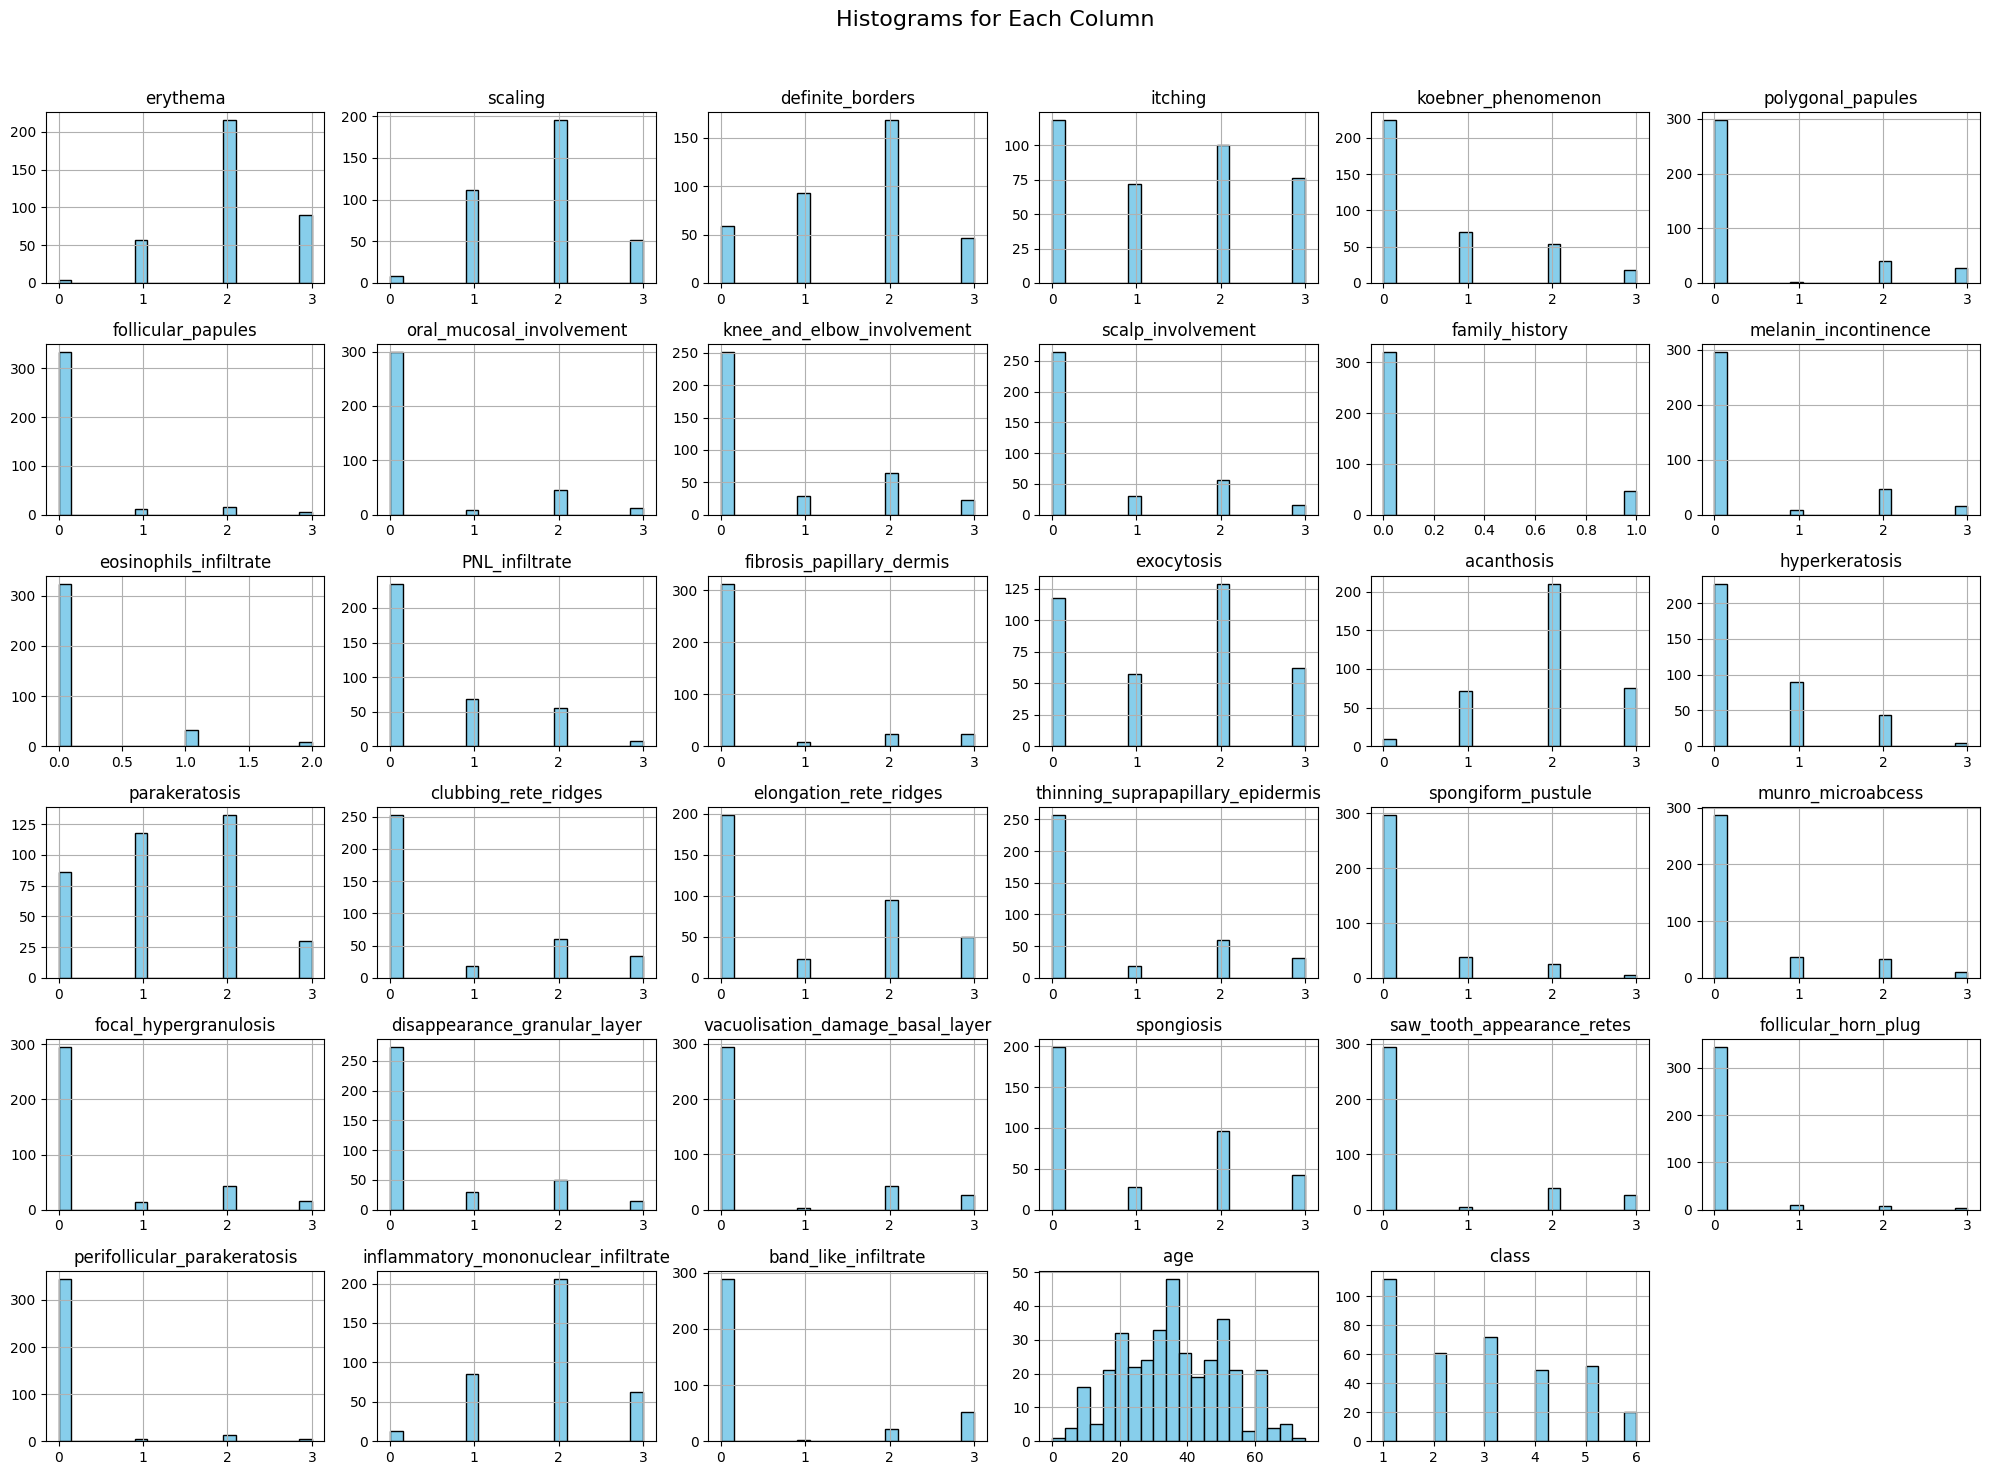

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'dermatology_database_1.csv'  # Update this path if needed
data = pd.read_csv(file_path)

# Convert 'age' column to numeric, replacing non-numeric entries with NaN, then filling with the median age
data['age'] = pd.to_numeric(data['age'], errors='coerce')
data['age'].fillna(data['age'].median(), inplace=True)

# Plot histograms for each column
data.hist(figsize=(20, 15), bins=20, color='skyblue', edgecolor='black')

# Add title
plt.suptitle("Histograms for Each Column", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plots
plt.show()


<ipython-input-11-6793cca1e8e9>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(), inplace=True)


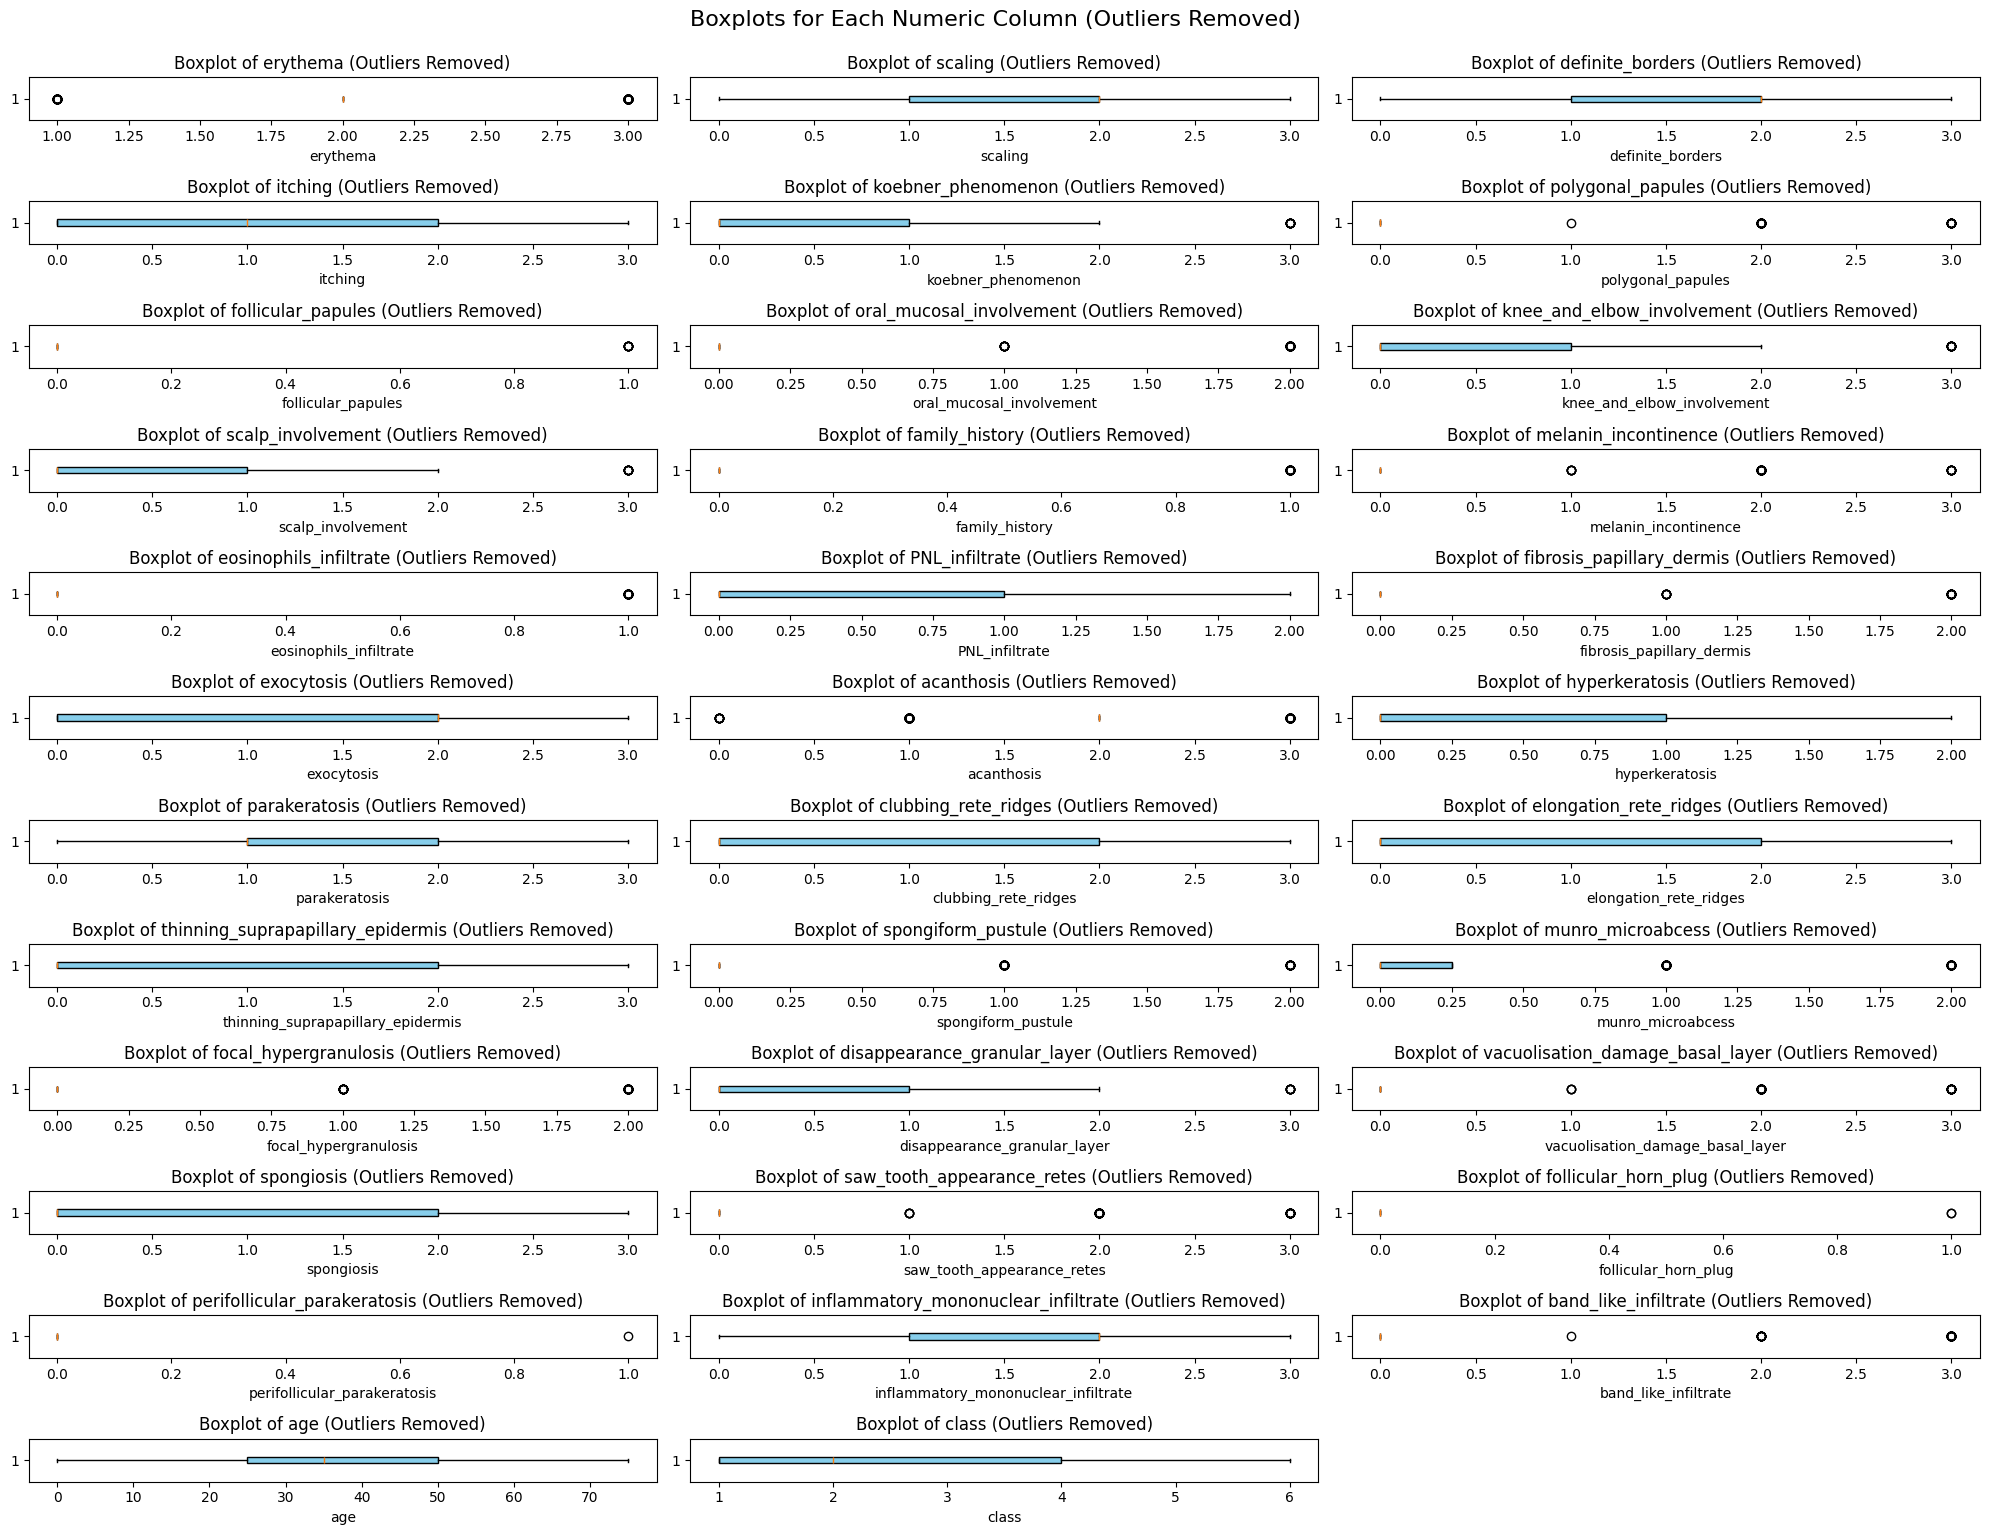

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

# Load the dataset
file_path = 'dermatology_database_1.csv'  # Update this path if needed
data = pd.read_csv(file_path)

# Convert 'age' column to numeric, replacing non-numeric entries with NaN, then filling with the median age
data['age'] = pd.to_numeric(data['age'], errors='coerce')
data['age'].fillna(data['age'].median(), inplace=True)

# Identify numeric columns for outlier detection
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Detect outliers using the z-score method (threshold set to 3)
z_scores = data[numeric_cols].apply(zscore)
outliers = (np.abs(z_scores) > 3).any(axis=1)

# Remove outliers
data_cleaned = data[~outliers]

# Select numeric columns from the cleaned data
numeric_cols_cleaned = data_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Create boxplots for each numeric column in the cleaned data
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_cols_cleaned, start=1):
    plt.subplot(len(numeric_cols_cleaned) // 3 + 1, 3, i)  # Arrange in rows of 3 boxplots each
    plt.boxplot(data_cleaned[col], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue', color='black'))
    plt.title(f"Boxplot of {col} (Outliers Removed)")
    plt.xlabel(col)

# Adjust layout
plt.tight_layout()
plt.suptitle("Boxplots for Each Numeric Column (Outliers Removed)", fontsize=16, y=1.02)
plt.show()